   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 30.2 MB/s eta 0:00:00
Using Colab cache for faster access to the 'sen12flood-flood-detection-dataset' dataset.
Dataset downloaded to: /kaggle/input/sen12flood-flood-detection-dataset
['SEN12FLOOD']
['0111', '7', '0105', '0217', '47', '0035', '0327', '0109', '0095', '0225', '17', '19', '0020', '0050', '0184', '0311', '0334', '22', '0086', '2', '0048', '0125', '0230', '0254', '0071', '0204', '0258', '0298', '35', '50', '0024', '23', '0250', '0007', '10', '0308', '5', '0070', '0275', '0282', '61', '0159', '36', '0210', '0316', '0220', '20', '0104', '0323', '0076', '45', '60', '0196', '27', '0030', '0200', '0068', '64', '0209', '41', '0328', '0163', '0259', '0234', '0192', '0313', '39', '0037', '0077', '0193', '32', '0294', '0325', '25', '42', '0080', '0236', '0261', '0333', '52', '0031', '0102', '0320', '0280', '0044', '0198', '0244', '0296', '0168', '0174', '0134', '8', '38', '0043', '12', '0214', '0085', '0326', '0117', '0148', '0

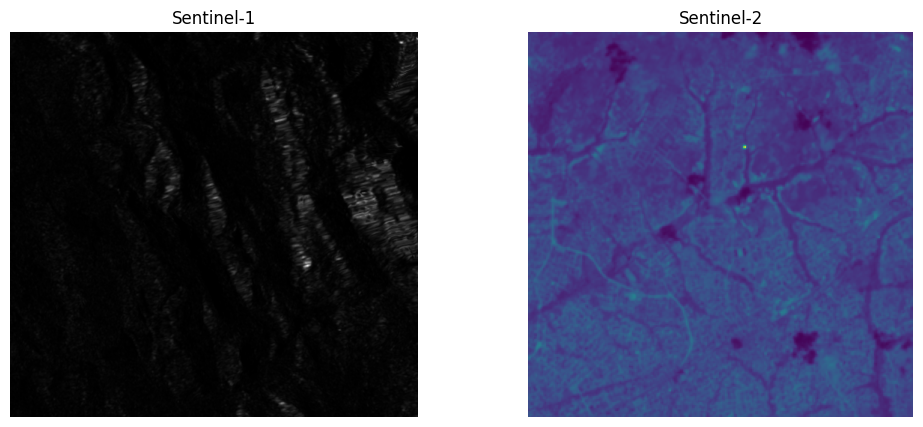

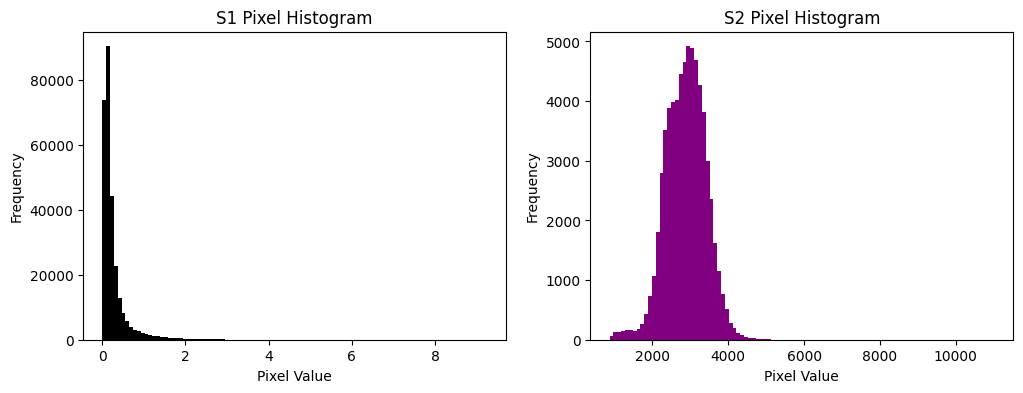

✅ Done! Displayed images + histograms.


In [ ]:
!pip install rasterio

import pandas as pd
import numpy as np
import os
import kagglehub
import rasterio
import matplotlib.pyplot as plt
import random
import glob

path = kagglehub.dataset_download("rhythmroy/sen12flood-flood-detection-dataset")
print("Dataset downloaded to:", path)

print(os.listdir(path))

root = os.path.join(path, "SEN12FLOOD")
print(os.listdir(root))

all_s1_files = []
all_s2_files = []

scene_dirs = [os.path.join(root, d) for d in os.listdir(root) if d.isdigit() and os.path.isdir(os.path.join(root, d))]
scene_dirs.sort()

for scene_dir in scene_dirs:
    tif_files_in_scene = glob.glob(os.path.join(scene_dir, "*.tif"))
    all_s1_files.extend([f for f in tif_files_in_scene if "S1" in os.path.basename(f)])
    all_s2_files.extend([f for f in tif_files_in_scene if "S2" in os.path.basename(f)])


s1_files = sorted(all_s1_files)
s2_files = sorted(all_s2_files)

print("S1 files:", len(s1_files))
print("S2 files:", len(s2_files))


idx = random.randint(0, len(s1_files)-1)
print("Random tile index:", idx)

with rasterio.open(s1_files[idx]) as f:
  s1_img = f.read(1)

with rasterio.open(s2_files[idx]) as f:
  s2_img = f.read(1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Sentinel-1")
plt.imshow(s1_img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Sentinel-2")
plt.imshow(s2_img, cmap="viridis")
plt.axis("off")
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(s1_img.flatten(), bins=100, color="black")
plt.title("S1 Pixel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(s2_img.flatten(), bins=100, color="purple")
plt.title("S2 Pixel Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

print("✅ Done! Displayed images + histograms.")